## Titanic Kaggle Project: Exploratory Data Analysis

In this notebook, I perform exploratory data analysis on the Titanic data set from Kaggle. \
The focus of this notebook is to explore, and identify relationships between features and passenger survival to build a Support Vector Machine (SVM) model. 

In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Read  data and look at the first few rows
titanic = pd.read_csv('../../Data/Titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check data types and missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Cabin** has a considerable number of missing values but we may not want to throw this feature out, it could help predict survival. \
**Age** contains a number of missing values as well, we can perform imputation with median age. \
**Embarked** has only two missing values, these rows can be discarded.

In [17]:
# Check num summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
# Split data into numerical and categorical features
print(titanic.columns)
numerical_df = titanic[['Age', 'SibSp', 'Parch', 'Fare']]
categorical_df = titanic[['Sex', 'Pclass', 'Embarked', 'Survived', 'Cabin', 'Ticket']]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


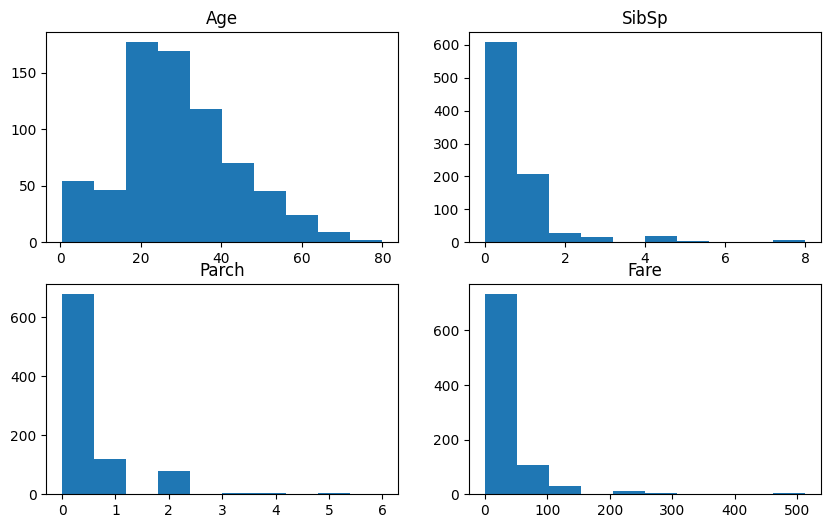

In [57]:
# Histogram of num features
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
for variable, subplot in zip(numerical_df, ax.flatten()):
    subplot.hist(numerical_df[variable])
    subplot.set_title(variable)

**Age** is slightly right skewed. \
The other num features are heavily right skewed

In [58]:
# Correlation matrix of num features
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


Negative correlation (moderate) between **Age** and **SibSp** indicates that as the age of a passenger increases, the number of siblings and spouses aboard tends to decrease on average.

Positive correlation (moderate) between **Parch** and **SibSp** indicates that as the number of parents and children aboard increases, so does the number of siblings and spouses aboard. Hence, families tend to travel together on average.

Positive correlation (moderate) between **Fare** and **Parch** indicates that as the number of parents and children aboard increases, so does the fare which is something that we would expect. 

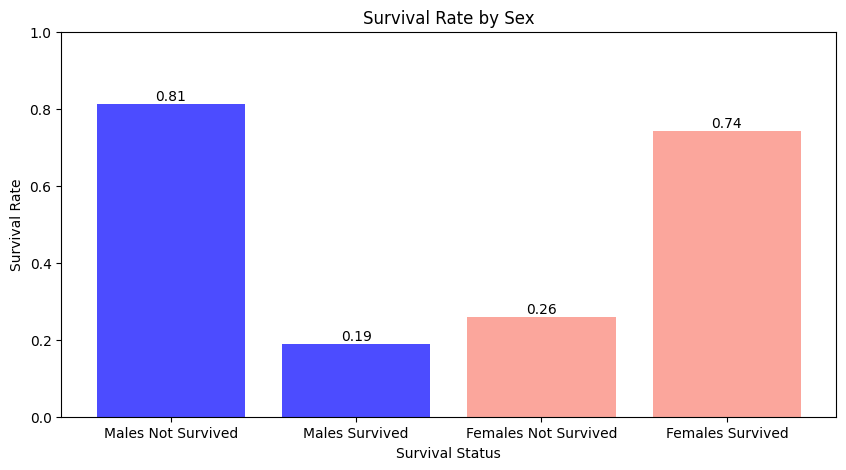

In [59]:
# Survival Rate Comparison between Male and Female Passengers
male_survival_rate = titanic[titanic['Sex'] == 'male']['Survived'].value_counts(normalize=True)
female_survival_rate = titanic[titanic['Sex'] == 'female']['Survived'].value_counts(normalize=True)

plt.figure(figsize=(10, 5))
bar_labels = ['Males Not Survived', 'Males Survived', 'Females Not Survived', 'Females Survived']
bar_values = [male_survival_rate[0], male_survival_rate[1], female_survival_rate[0], female_survival_rate[1]]

colors = ['blue', 'blue', 'salmon', 'salmon']

plt.bar(bar_labels, bar_values, color=colors, alpha=0.7)

for i in range(4):
    plt.text(x=i, y=bar_values[i] + 0.01, s=round(bar_values[i], 2), ha='center')

plt.ylim(0, 1)
plt.xlabel('Survival Status')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

Approximately 1 in 5 male passengers survived. \
Approximately 3 in 4 female passengers survived.

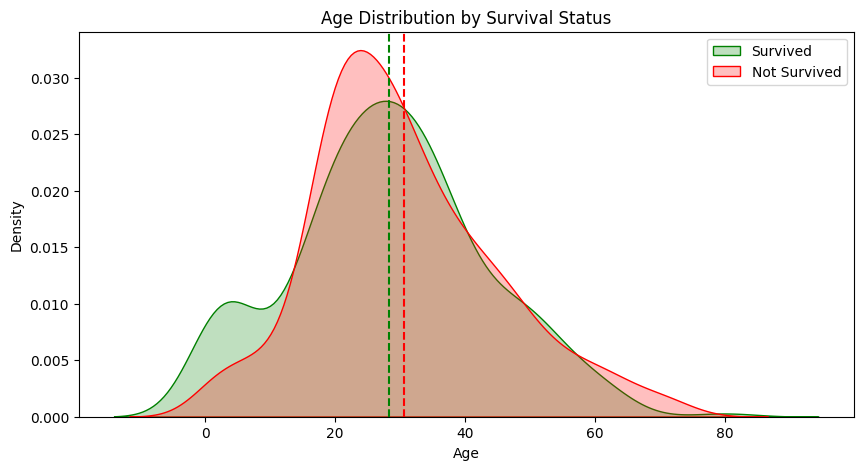

In [60]:
# Distribution of Ages between those who survived and those who did not
survived_ages = titanic[(titanic['Survived'] == 1) & (titanic['Age'].notna())]['Age']
not_survived_ages = titanic[(titanic['Survived'] == 0) & (titanic['Age'].notna())]['Age']

plt.figure(figsize=(10, 5))
sns.kdeplot(survived_ages, color='green', label='Survived', fill=True)
sns.kdeplot(not_survived_ages, color='red', label='Not Survived', fill=True)

plt.axvline(survived_ages.mean(), color='green', linestyle='dashed')
plt.axvline(not_survived_ages.mean(), color='red', linestyle='dashed')
plt.legend()

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.show()

Those who did not survive were slightly older on average, than those who did. \
We can conduct a Two-sample t-test, assuming certain conditions hold, to determine if the difference in mean age between survivors and non-survivors is statistically significant.\

$H_0:\mu_{1}-\mu_{2}=0$

$H_a:\mu_1-\mu_2\neq0$

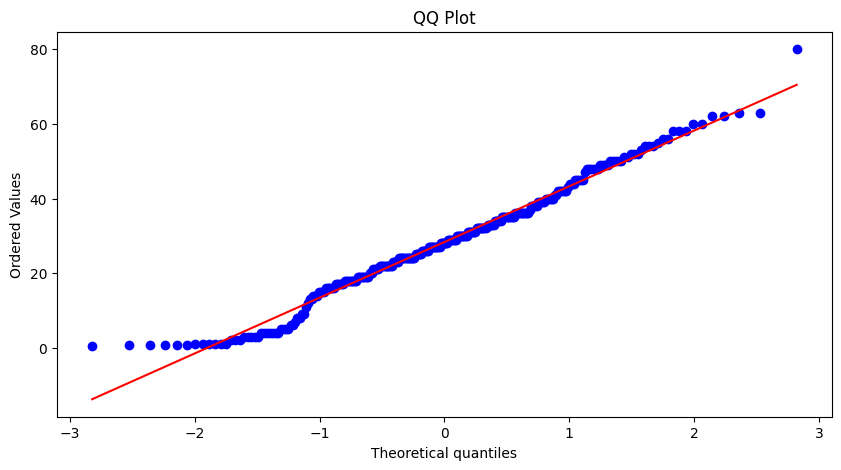

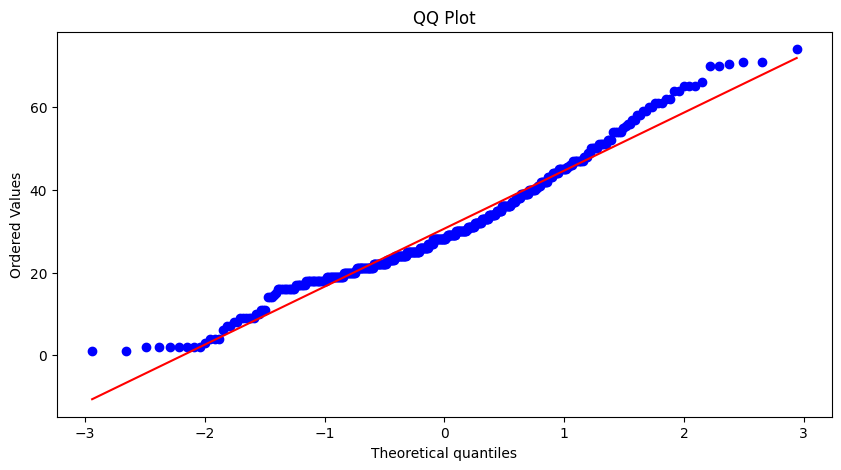

In [39]:
# QQ Plot of survival ages to check for normality
for i in [survived_ages, not_survived_ages]:
    plt.figure(figsize=(10, 5))
    stats.probplot(i, plot=plt)
    plt.title('QQ Plot')
    plt.show()

In [79]:
# Hypothesis Testing
# Null Hypothesis: There is no difference between the ages of those who survived and those who did not
# Alternative Hypothesis: There is a difference between the ages of those who survived and those who did not
t_stat, p_val = stats.ttest_ind(survived_ages, not_survived_ages, equal_var=False)
print('T-statistic: ', t_stat)
print('P-value: ', p_val)

alpha = 0.05
if p_val < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

T-statistic:  -2.0460301043939704
P-value:  0.04118965162586639
Reject the null hypothesis


In [61]:
pd.pivot_table(titanic, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


The first column of this table confirms the discovery that was made in the density plot, that those who did not survive were slightly older on average. \
We can also see that those who survived paid a higher fare on average. \
Aside from that, passengers who survived traveled with more parents and children on average based on the mean Parch. \
Lastly, the final column shows that survivors had fewer siblings and spouses aboard, on average. 

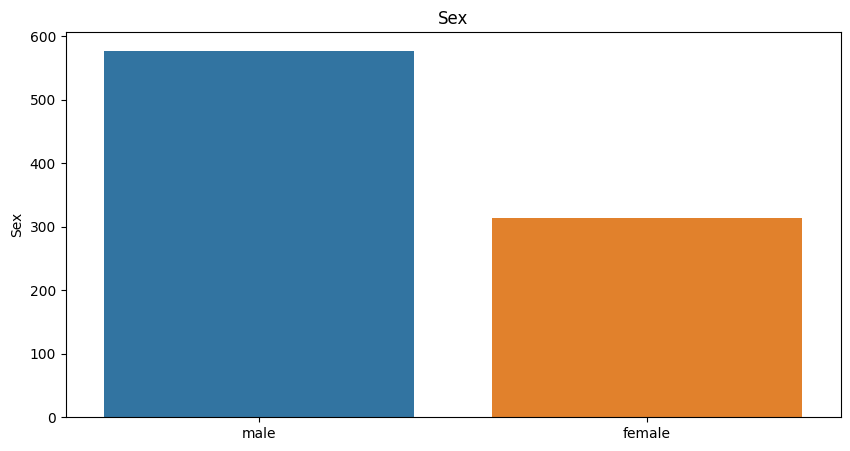

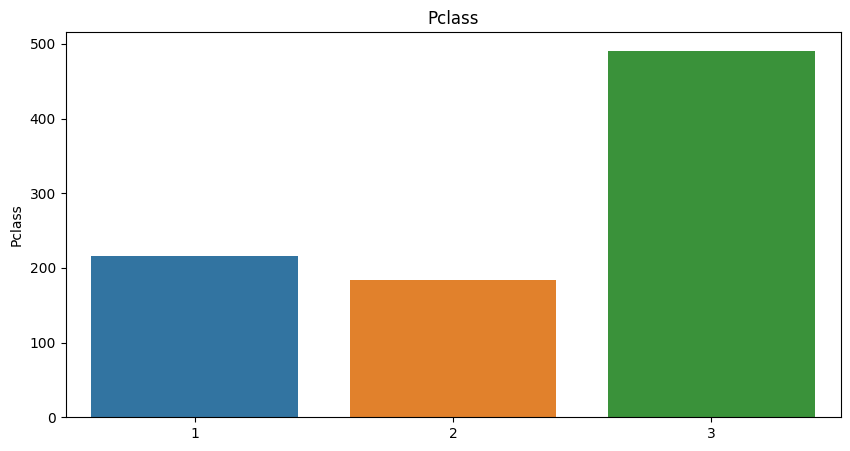

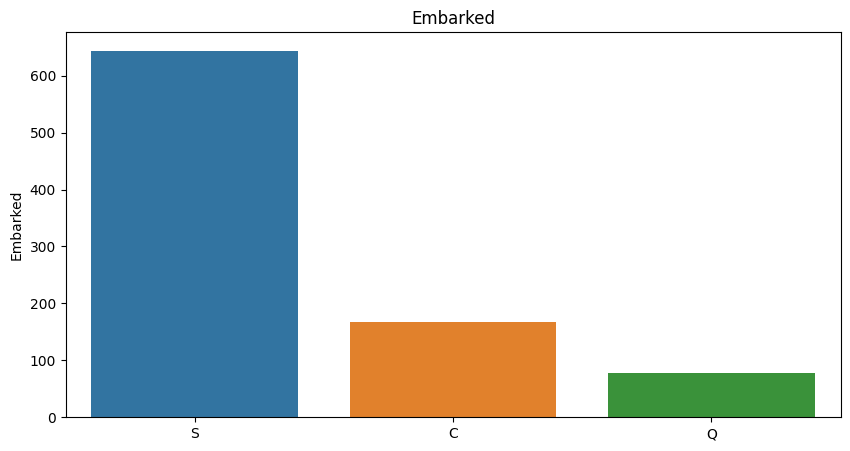

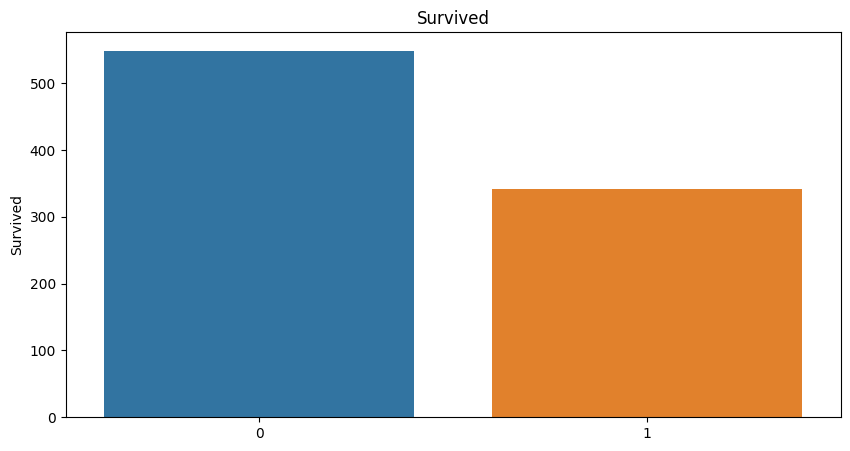

In [62]:
# Bar plots of Sex, Pclass, Embarked, and Survived features
for variable in categorical_df.columns[:4]:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=categorical_df[variable].value_counts().index, y=categorical_df[variable].value_counts())
    plt.title(variable)
    plt.show()

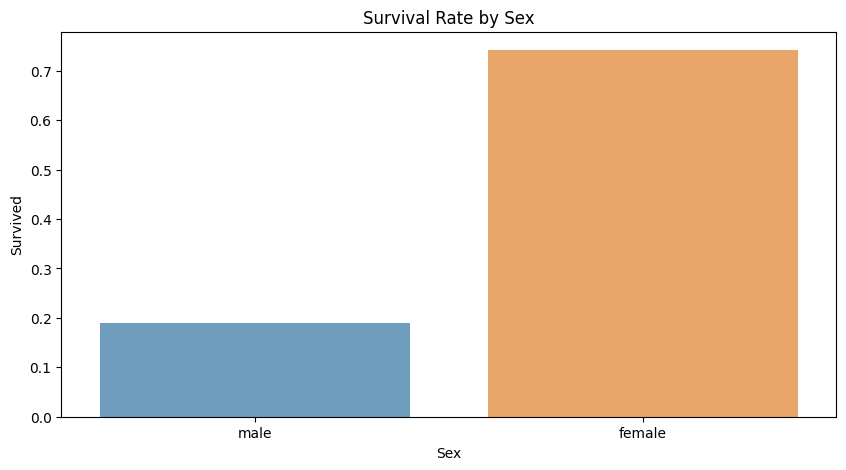

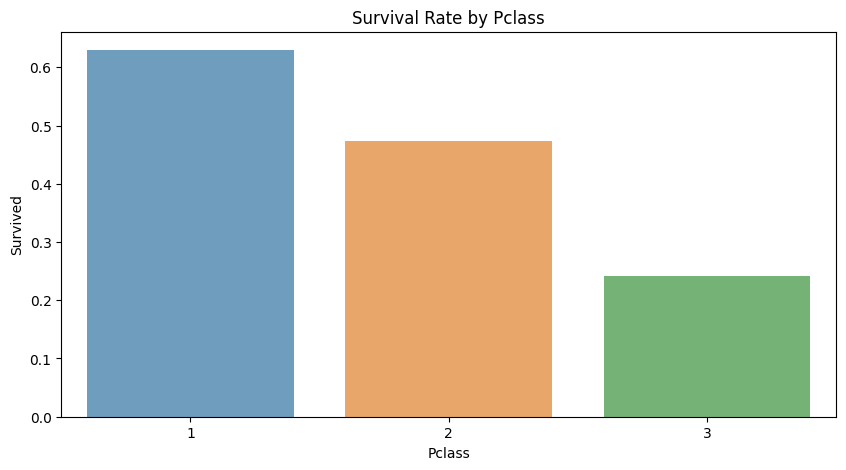

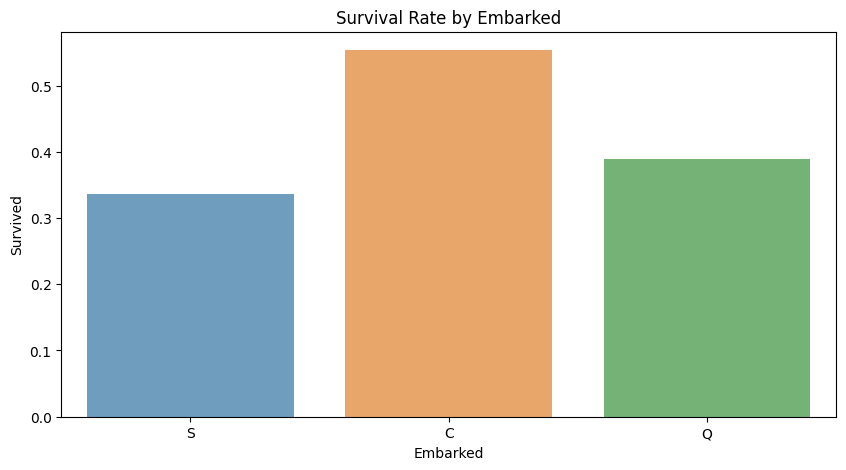

In [63]:
# Bar plots of Survival Rate across Sex, Pclass, and Embarked
for feature in categorical_df.columns[0:3]:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature, y='Survived', data=categorical_df, alpha=0.7, errorbar=None)
    plt.title('Survival Rate by {}'.format(feature))
    plt.show()

In [66]:
# Create pivot table for survival rate comparisons across categorical features
for feature in categorical_df.columns[:3]:
        print(pd.pivot_table(titanic, index='Survived', columns=feature, values='PassengerId', aggfunc='count'))
        print('\n')

Sex       female  male
Survived              
0             81   468
1            233   109


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217




In [71]:
# Distribution of Titles
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
titanic['Title'] = titanic['Title'].apply(lambda x: x if x in ['Ms', 'Miss', 'Mrs', 'Mme', 'Lady', 'Mr', 'Dr', 'Rev', 'Master', 'Major', 'Col', 'Capt'] else 'Other') 
titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Other       6
Rev         6
Major       2
Col         2
Mme         1
Ms          1
Lady        1
Capt        1
Name: Title, dtype: int64

In [73]:
pd.pivot_table(titanic, index='Survived', columns='Title', values='PassengerId', aggfunc='count', fill_value=0)

Title,Capt,Col,Dr,Lady,Major,Master,Miss,Mme,Mr,Mrs,Ms,Other,Rev
Survived,,,,,,,,,,,,,
0,1,1,4,0,1,17,55,0,436,26,0,2,6
1,0,1,3,1,1,23,127,1,81,99,1,4,0


In [77]:
# Distribution of Cabin Letters
titanic['Cabin'].value_counts()
titanic['Cabin'] = titanic['Cabin'].str[0]
titanic['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [78]:
pd.pivot_table(titanic, index='Survived', columns='Cabin', values='PassengerId', aggfunc='count', fill_value=0)

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,12,24,8,8,5,2,1
1,7,35,35,25,24,8,2,0
